In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

data_dir = '../plot_data/'
box_length = 55.882675

In [2]:
kBT = 8.314 * 300.0 # J/mol
mass = 3.0 * 16e-3  # kg/mol, ozone
d_gas = 0.12 * 1e4  # A^2/ps, gas phase diffusion constant for ozone
d_liquid = 1.76e-5 * 1e4  # A^2/ps, liquid phase diffusion constant for ozone
gamma_gas = kBT / mass / (d_gas) * 1e-4 # 1/ps, gas phase friction
gamma_liquid = kBT / mass / (d_liquid) * 1e-4 # 1/ps, liquid pahse friction

## form of gamma function
def gamma_function(x, width_x=0.1, shift_x=20, power=2.0):
    result = np.where(x > 0, (np.tanh(width_x * (-x + shift_x)) / 2 + 0.5)**power * (gamma_liquid - gamma_gas) +
                      gamma_gas, (np.tanh(width_x * (x + shift_x)) / 2 + 0.5)**power * (gamma_liquid - gamma_gas) + gamma_gas)
    return result

### TOC image

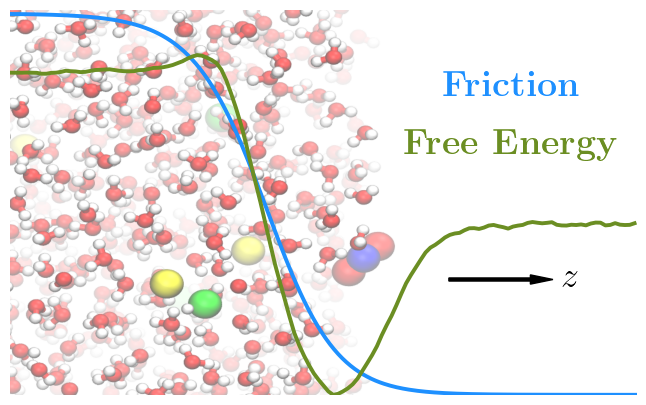

In [3]:
pmf_water = np.loadtxt(data_dir + 'waterPMF.txt')
pmf_nai = np.loadtxt(data_dir + 'waterNaIPMF.txt')
pmf_naicl = np.loadtxt(data_dir + 'waterNaIClPMF.txt')
image_box = plt.imread(data_dir + 'mdTOC.png')
optim_water = np.loadtxt(data_dir + 'optim_water.txt')
optim_NaI = np.loadtxt(data_dir + 'optim_waterNaI.txt')
optim_NaICl = np.loadtxt(data_dir + 'optim_waterNaICl.txt')

w_water, s_water, p_water = optim_water[np.argsort(optim_water[:, 0])[0]][1:]
w_nai, s_nai, p_nai = optim_NaI[np.argsort(optim_NaI[:, 0])[0]][1:]
w_naicl, s_naicl, p_naicl = optim_NaICl[np.argsort(optim_NaICl[:, 0])[0]][1:]


## dummy x and boundaries
plt_x = np.linspace(-50.0, 50.0, 1001)
ymin=-0.01; ymax=29.8

plt.figure(figsize=(8.09, 5))
## add curves and background image
plt.plot(plt_x, gamma_function(plt_x, w_water, s_water, p_water), color='dodgerblue', lw=2.8)
plt.plot(pmf_naicl[:, 0], 10 * pmf_naicl[:, 1] , color='olivedrab', lw=2.8)
plt.imshow(image_box, extent=[4.9, 33, ymin, ymax], aspect='auto', alpha=0.65)
## add arrows
plt.text(0.8, 0.8, r'\bf{Friction}', fontsize=26, color='dodgerblue', verticalalignment='center', \
     horizontalalignment='center', transform=plt.gca().transAxes)
plt.text(0.8, 0.65, r'\bf{Free Energy}', fontsize=26, color='olivedrab', verticalalignment='center', \
     horizontalalignment='center', transform=plt.gca().transAxes)

plt.axis('off')
plt.axis([5, 35, ymin, ymax])
plt.margins(x=0)
plt.arrow(0.7, 0.3, 0.13, 0, width=0.008, transform=plt.gca().transAxes, color='k')
plt.text(0.88, 0.28, r'$z$', transform=plt.gca().transAxes, fontsize=26)
## save figure
# # plt.savefig('toc.pdf', bbox_inches='tight', dpi=800)
plt.show()

### Fig 1 : MD snapshot image

### Fig 2 : Free energy profiles

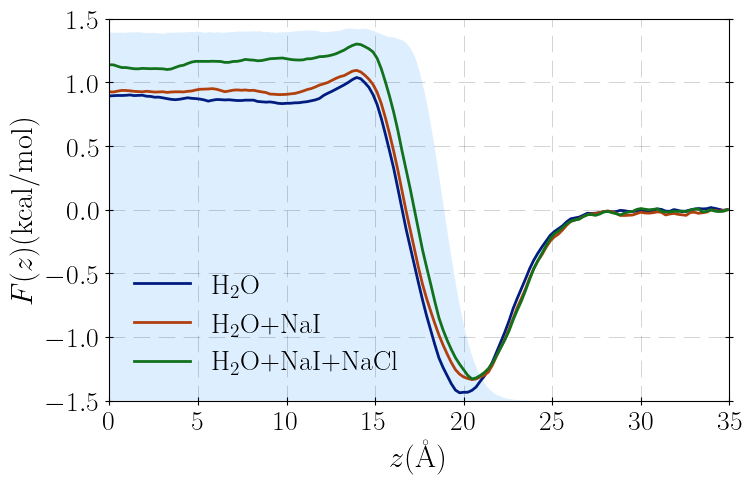

In [4]:
colors = sns.color_palette('dark')

water_density = np.loadtxt(data_dir + 'water_density_profile')

lw = 2

plt.figure(figsize=(8, 4.96))
plt.fill(water_density[:,0], (3.1*water_density[:,1] - 1.5),
         color='dodgerblue', alpha=0.15, linewidth=0)
plt.plot(pmf_water[:, 0], pmf_water[:, 1] - pmf_water[:, 1][-1],
         label=r'H$_2$O', linewidth=lw, color=colors[0])
plt.plot(pmf_nai[:, 0], pmf_nai[:, 1] - pmf_nai[:, 1][-1],
         label=r'H$_2$O+NaI', linewidth=lw, color=colors[1])
plt.plot(pmf_naicl[:, 0], pmf_naicl[:, 1] - pmf_naicl[:, 1][-1],
         label=r'H$_2$O+NaI+NaCl', linewidth=lw, color=colors[2])

plt.ylim(bottom=-1.5, top=1.5)
plt.xlim([0, 35])
plt.xlabel(r'$z(\mathrm{\AA})$', fontsize=22, color='k')
plt.ylabel(r'$F(z)$(kcal/mol)', fontsize=22, color='k')
plt.tick_params(labelsize=20, left=True, right=True,
                direction='inout', length=6)
plt.legend(frameon=False, fontsize=20, loc='lower left')
plt.grid(alpha=0.2, color='k', linestyle=(1, (20, 10)), linewidth=0.6)

## plt.savefig('ozone_with_ions_pmf.pdf', bbox_inches='tight', dpi=800)
plt.show()

### Fig 3 : Position distribution (MD)

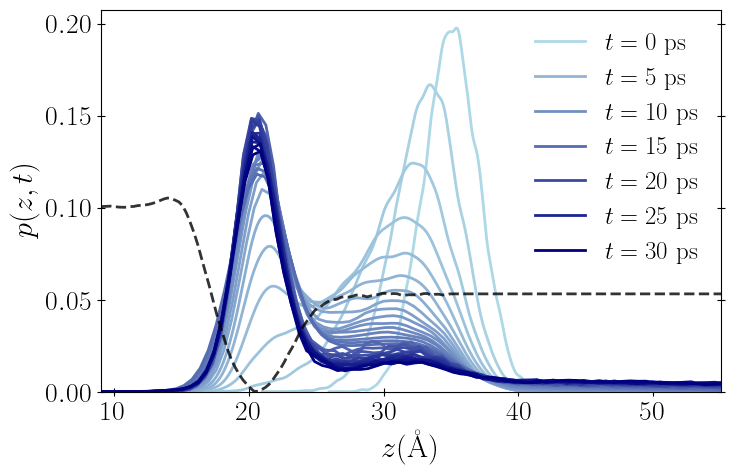

In [5]:
subDir = data_dir + 'prob_data_NaICl/'

catx = np.linspace(-box_length, box_length, 401)
colors = sns.color_palette('blend:lightblue,Navy', 31)

xbin = np.linspace(19.0, 35.0, 25)
lw=2.0

plt.figure(figsize=(8, 4.96))
for i in range(31):
    density_time = i
    f1 = np.loadtxt(subDir + 'final.' + str(density_time) + '.txt', skiprows=1)
    x = f1[:,1]
    v = f1[:,2]

    x = np.where( x>= box_length, -box_length + (x%box_length), np.where(x<= -box_length, box_length - (np.abs(x)%box_length), x ) )

    if i > 15:
        bandwidth = 0.1
    else:
        bandwidth = 0.8

    if i == 0:
        xtot = x
        vtot = v
    else:
        xtot = np.concatenate((xtot, x))
        vtot = np.concatenate((vtot, v))
    
    ## bw_adjust is a tricky parameter
    if (i%(30/6)) == 0:
        sns.kdeplot(x, color=colors[i], label=r'$t=%.0f$ ps'%(density_time), lw=lw, bw_adjust=bandwidth)
    else:
        sns.kdeplot(x, color=colors[i], lw=lw, bw_adjust=bandwidth)

def fittedPMF(catx, array2D):
    x = array2D[:,0]
    y = array2D[:,1]
    fittedX = interpolate.InterpolatedUnivariateSpline(x, y, k=5)
    res = np.zeros(len(catx))
    for i in range(len(catx)):
        if catx[i] >= x[-1]:
            res[i] = fittedX(x[-1])
        elif catx[i] <= x[0]:
            res[i] = fittedX(x[0])
        else:
            res[i] = fittedX(catx[i])
    return res


plt.plot(catx, 0.04*fittedPMF(catx, pmf_naicl), lw=2, linestyle='--', color='k', alpha=0.8)
plt.tick_params(axis='both', direction='inout', labelsize=20, right=True, length=6)
plt.legend(frameon=False, fontsize=18)
plt.ylabel('$p(z,t)$', fontsize=22, color='k')
plt.xlabel(r'$z(\mathrm{\AA})$', fontsize=22, color='k')
plt.xlim(left = min(xbin) - 10, right = max(xbin) + 20)
# # plt.savefig('Figure3.pdf', bbox_inches='tight', dpi=800)
plt.show()



### Fig 4 : Friction profiles $\gamma(z)$

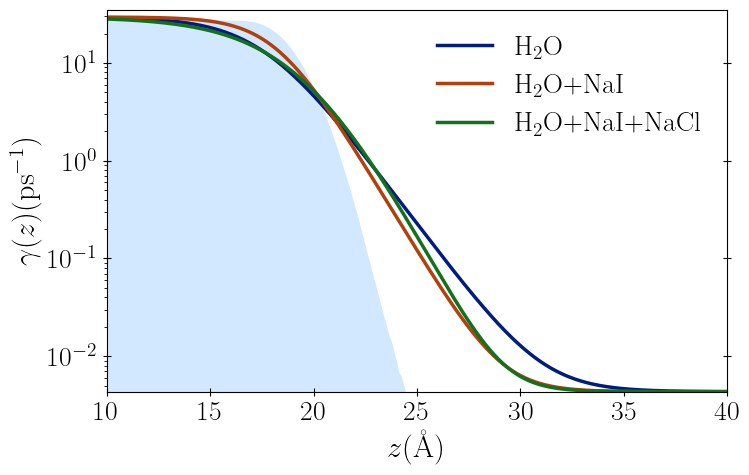

In [6]:
colors = sns.color_palette('dark')
plt_x = np.linspace(0.0, 55.0, 1000)

lw = 2.5
test_y = gamma_function(plt_x, w_water, s_water, p_water)

plt.figure(figsize=(8, 4.96))
plt.plot(plt_x, gamma_function(plt_x,  w_water,
         s_water, p_water), color=colors[0], label=r'H$_2$O', linewidth=lw)
plt.plot(plt_x, gamma_function(plt_x, w_nai,
         s_nai, p_nai), color=colors[1], label=r'H$_2$O+NaI', linewidth=lw)
plt.plot(plt_x, gamma_function(plt_x,  w_naicl,
         s_naicl, p_naicl), color=colors[2], label=r'H$_2$O+NaI+NaCl', linewidth=lw)
plt.fill(water_density[:,0], max(test_y)*water_density[:,1],
         color='dodgerblue', alpha=0.2, linewidth=0)
plt.xlabel(r'$z(\mathrm{\AA})$', fontsize=22)
plt.ylabel(r'$\gamma(z) (\mathrm{ps}^{-1})$', fontsize=22)
plt.tick_params(labelsize=20, left=True, right=True, direction='inout', length=6)
plt.gca().set_yscale('log')
plt.xlim([10, 40])
plt.ylim(top=35)
plt.ylim(bottom=gamma_gas)
plt.legend(frameon=False, loc='best', fontsize=20)
# # plt.savefig('Figure4.pdf', bbox_inches='tight', dpi=800)
plt.show()

### Fig 5 : Compare with MD 

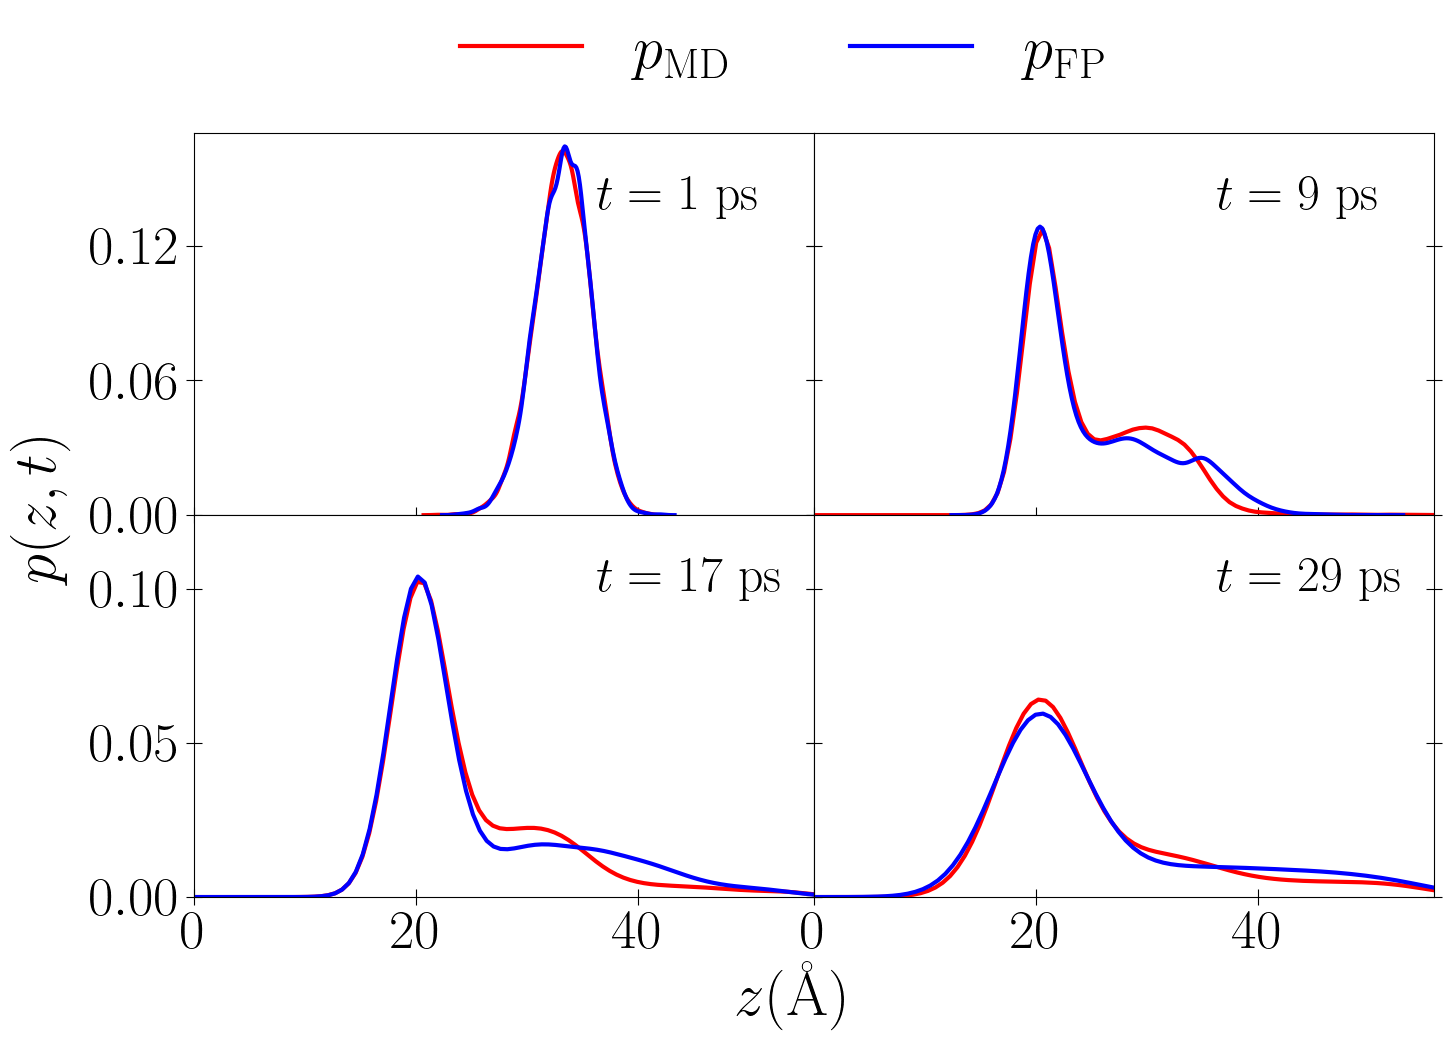

In [7]:
md_dir = data_dir + 'prob_data_waterMD/'
lang_dir = data_dir + 'prob_data_waterLang/'


check_point = [1, 9, 17, 29]

col1 = 'red'
col2 = 'blue'


def data_md(i):
    assert type(i) == int
    f1 = np.loadtxt(md_dir + 'final.' + str(i) + '.txt', skiprows=1)[:, 1]
    f1 = np.where(f1 >= box_length, -box_length + f1 % box_length,
                  np.where(f1 <= -box_length, box_length - abs(f1) % box_length, f1))
    return f1


def data_lang(i):
    assert type(i) == int
    f1 = np.loadtxt(lang_dir + 'probability_position_' + str(i) + '.txt')
    f1 = np.where(f1 >= box_length, -box_length + f1 % box_length,
                  np.where(f1 <= -box_length, box_length - abs(f1) % box_length, f1))
    return f1

lw = 3.0
ls = 40
tick_length = 12

fig = plt.figure(figsize=(2.0*8, 2.0*4.96))
plt.subplots_adjust(wspace=0, hspace=0)

plt1 = plt.subplot(2, 2, 1)
sns.kdeplot(data_md(check_point[0]), color=col1, lw=lw)
sns.kdeplot(data_lang(check_point[0]), color=col2, lw=lw)
plt.ylabel(None)
plt.axis([0, box_length, 0, 0.17])
plt.gca().xaxis.set_ticklabels([])
plt1.tick_params(axis='both', direction='inout', left=True, right=True, length=tick_length, labelsize=ls)
plt.text(0.65, 0.8, r'$t=%s$ ps' %(check_point[0]), transform=plt.gca().transAxes, fontsize=36)
plt.yticks([0.0, 0.06, 0.12])

plt2 = plt.subplot(2, 2, 2)
sns.kdeplot(data_md(check_point[1]), color=col1, label=r'$p_{\mathrm{MD}}$', lw=lw)
sns.kdeplot(data_lang(check_point[1]), color=col2, label=r'$p_{\mathrm{FP}}$', lw=lw)
handles, labels = plt.gca().get_legend_handles_labels()
plt.axis([0, box_length, 0, 0.17])
plt.ylabel(None)
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.xlim(left=0, right=box_length)
plt.yticks([0.0, 0.06, 0.12])
plt2.tick_params(axis='both', direction='inout', left=True, right=True, length=tick_length, labelsize=ls)
plt.text(0.65, 0.8, r'$t=%s$ ps' %(check_point[1]), transform=plt.gca().transAxes, fontsize=36)

plt3 = plt.subplot(2, 2, 3)
sns.kdeplot(data_md(check_point[2]), color=col1, lw=lw)
sns.kdeplot(data_lang(check_point[2]), color=col2, lw=lw)
plt.axis([0, box_length, 0, 0.124])
plt.ylabel(None)
plt3.tick_params(axis='both', direction='inout', left=True, right=True, length=tick_length, labelsize=ls)
plt.yticks([0.0, 0.05, 0.10])
plt.text(0.65, 0.8, r'$t=%s$ ps' %(check_point[2]), transform=plt.gca().transAxes, fontsize=36)

plt4 = plt.subplot(2, 2, 4)
sns.kdeplot(data_md(check_point[3]), color=col1, lw=lw)
sns.kdeplot(data_lang(check_point[3]), color=col2, lw=lw)
plt.axis([0, box_length, 0, 0.124])
plt.ylabel(None)
plt.gca().yaxis.set_ticklabels([])
plt4.tick_params(axis='both', direction='inout', left=True, right=True, length=tick_length, labelsize=ls)
plt.text(0.65, 0.8, r'$t=%s$ ps' %(check_point[3]), transform=plt.gca().transAxes, fontsize=36)

fig.legend(handles, labels, loc=(0.3,0.9), frameon=False, ncols=2, fontsize=44)
fig.supylabel('$p(z,t)$', x=0.01,  fontsize=44, color='k')
fig.supxlabel(r'$z(\mathrm{\AA})$', y=-0.025, fontsize=44, color='k')

# # plt.savefig('Figure5.pdf', bbox_inches='tight', dpi=800)

plt.show()


### Fig 6 : $\chi_b(t)$ and $\chi_g(t)$

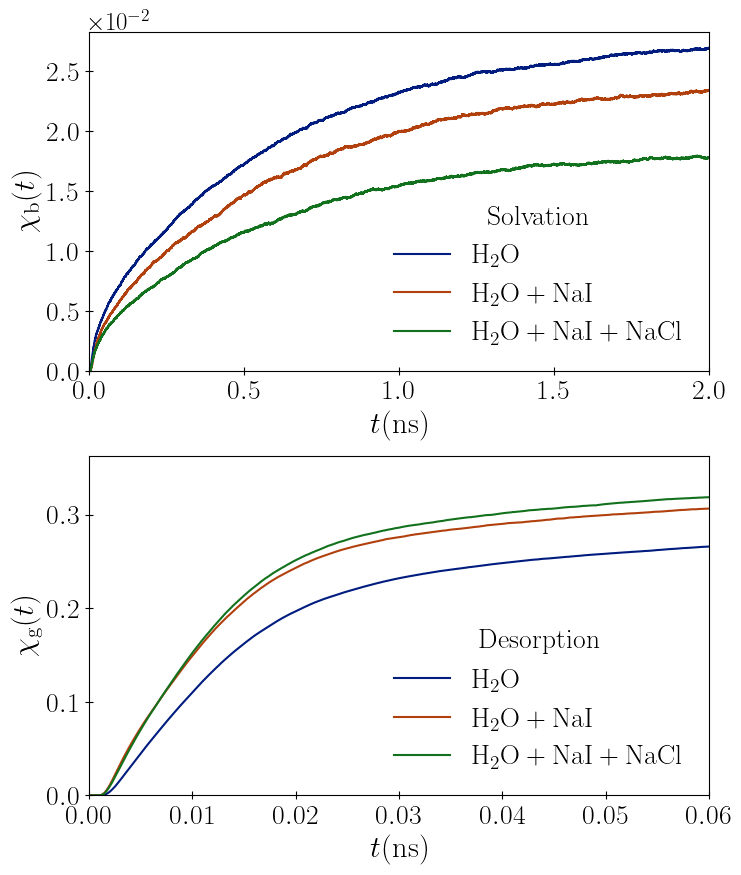

In [8]:
colors = sns.color_palette('dark')

chi_s_water = np.loadtxt(data_dir + 'chi_sol_water.txt')
chi_s_NaI = np.loadtxt(data_dir + 'chi_sol_NaI.txt')
chi_s_NaICl = np.loadtxt(data_dir + 'chi_sol_NaICl.txt')
chi_d_water = np.loadtxt(data_dir + 'chi_des_water.txt')
chi_d_NaI = np.loadtxt(data_dir + 'chi_des_NaI.txt')
chi_d_NaICl = np.loadtxt(data_dir + 'chi_des_NaICl.txt')

lw = 1.5

fig = plt.figure(figsize=(8, 2*4.96))
plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 2)
plt.plot(chi_d_water[:,0]/1000,chi_d_water[:,1], color=colors[0], label=r'$\mathrm{H_2O}$', linewidth=lw)
plt.plot(chi_d_NaI[:,0]/1000,chi_d_NaI[:,1], color=colors[1], label=r'$\mathrm{H_2O+NaI}$', linewidth=lw)
plt.plot(chi_d_NaICl[:,0]/1000, chi_d_NaICl[:,1], color=colors[2], label=r'$\mathrm{H_2O+NaI+NaCl}$', linewidth=lw)
plt.ylabel(r'$\chi_{\mathrm{g}}(t)$', fontsize=22)
plt.xlabel(r'$t$(ns)', fontsize=22)
plt.xlim(left=0, right=60/1000)
plt.ylim(bottom=0)
plt.legend(frameon=False, fontsize=20, alignment='center', title=r'Desorption', title_fontsize=20)
plt.tick_params(axis='both', labelsize=20, left=True, direction='inout', length=6)

plt.subplot(2, 1, 1)
plt.plot(chi_s_water[:,0]/1000,chi_s_water[:,1], color=colors[0], label=r'$\mathrm{H_2O}$', linewidth=lw)
plt.plot(chi_s_NaI[:,0]/1000,chi_s_NaI[:,1], color=colors[1], label=r'$\mathrm{H_2O+NaI}$', linewidth=lw)
plt.plot(chi_s_NaICl[:,0]/1000, chi_s_NaICl[:,1], color=colors[2], label=r'$\mathrm{H_2O+NaI+NaCl}$', linewidth=lw)
plt.ylim(bottom=0)
plt.xlim(left=0, right=2000/1000)
plt.xlabel(r'$t$(ns)', fontsize=22)
plt.ylabel(r'$\chi_{\mathrm{b}}(t)$', fontsize=22)
plt.legend(frameon=False, fontsize=20, title=r'Solvation', title_fontsize=20)
plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4, 5))
plt.tick_params(axis='both', labelsize=20, left=True, direction='inout', length=6)

# # plt.savefig('Figure6.pdf',bbox_inches='tight', dpi=800)

plt.show()


### Fig 7 : $S(t)$ and $\dot{S}(t)$

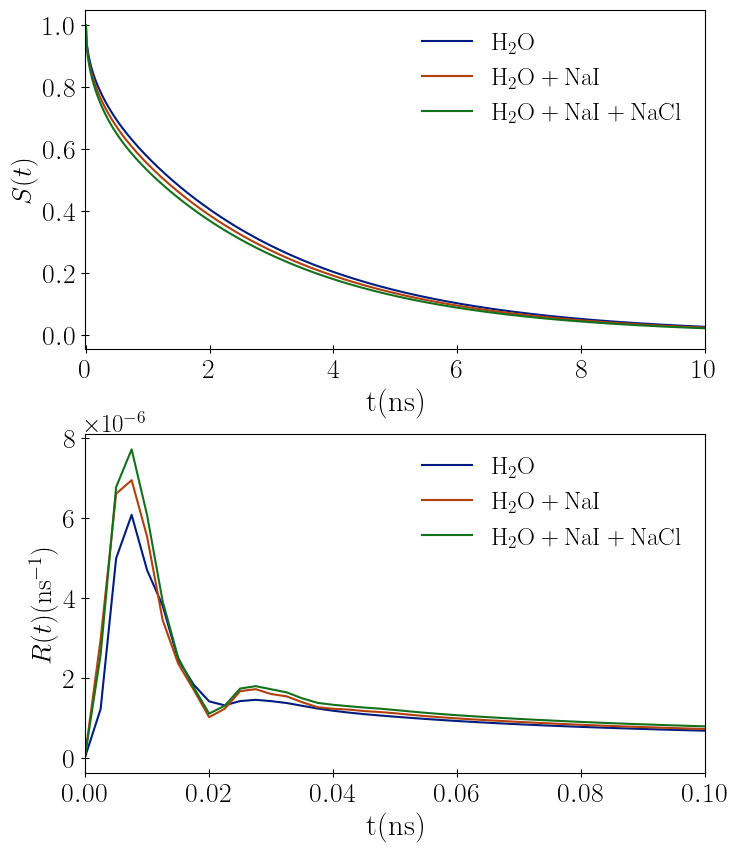

In [9]:
colors = sns.color_palette('dark')

water_st = np.loadtxt(data_dir + 'water_st.txt')
water_st = water_st[np.lexsort((water_st[:, 1], water_st[:, 0]))]
waterNaI_st = np.loadtxt(data_dir + 'waterNaI_st.txt')
waterNaI_st = waterNaI_st[np.lexsort((waterNaI_st[:, 1], waterNaI_st[:, 0]))]
waterNaICl_st = np.loadtxt(data_dir + 'waterNaICl_st.txt')
waterNaICl_st = waterNaICl_st[np.lexsort((waterNaICl_st[:, 1], waterNaICl_st[:, 0]))]

fig = plt.figure(figsize=(8, 2*4.96))
plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 1)
plt.plot(water_st[:, 0]/(10**6), water_st[:, 1], label=r'$\mathrm{H_2O}$', color=colors[0], lw=lw)
plt.plot(waterNaI_st[:, 0]/(10**6), waterNaI_st[:, 1], label=r'$\mathrm{H_2O+NaI}$', color=colors[1], lw=lw)
plt.plot(waterNaICl_st[:, 0]/(10**6), waterNaICl_st[:, 1], label=r'$\mathrm{H_2O+NaI+NaCl}$', color=colors[2], lw=lw)
plt.xlim(left=-0.01, right=1.0e1)
plt.legend(frameon=False)
plt.xlabel(r't(ns)', fontsize=22)
plt.ylabel(r'$S(t)$', fontsize=20)
plt.tick_params(axis='both', labelsize=20, left=True, direction='inout', length=6)

plt.subplot(2, 1, 2)
plt.plot(water_st[:, 0]/(10**6), -np.gradient(water_st[:, 1], water_st[:, 0]), label=r'$\mathrm{H_2O}$', color=colors[0], lw=lw)
plt.plot(waterNaI_st[:, 0]/(10**6), -np.gradient(waterNaI_st[:, 1], waterNaI_st[:, 0]), label=r'$\mathrm{H_2O+NaI}$', color=colors[1], lw=lw)
plt.plot(waterNaICl_st[:, 0]/(10**6), -np.gradient(waterNaICl_st[:, 1], waterNaICl_st[:, 0]), label=r'$\mathrm{H_2O+NaI+NaCl}$', color=colors[2], lw=lw)
plt.xlim(left=0, right=1.0e-1)
plt.legend(frameon=False)

plt.xlabel(r't(ns)', fontsize=22)
plt.ylabel(r'$R(t) (\mathrm{ns}^{-1})$', fontsize=20)
plt.tick_params(axis='both', labelsize=20, left=True, direction='inout', length=6)

# # plt.savefig('Figure7.pdf', bbox_inches='tight', dpi=800)

plt.show()